# Group 12 DSA Batch 1 submission for Competition

# -------------------------------------------------------------------------

## As part of competition group was assigned to do casestudy on covid related dataset. 

### Initial Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 - Data Collection

### For this case study we used Israeli Ministry of Health public dataset

In [ ]:
data=pd.read_csv("Data_Covid_final.csv")
dataForAnalysis=data
data.head()

In [ ]:
data.shape

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186273 entries, 0 to 2186272
Data columns (total 11 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Unnamed: 0           int64 
 1   test_date            object
 2   cough                int64 
 3   fever                int64 
 4   sore_throat          int64 
 5   shortness_of_breath  int64 
 6   head_ache            int64 
 7   corona_result        object
 8   age_60_and_above     object
 9   gender               object
 10  test_indication      object
dtypes: int64(6), object(5)
memory usage: 183.5+ MB


# 2 - Pre-Processing

### i) Missing value handling

In [5]:
#Let's see if there is any missing values in dataset
data.isna().sum()

Unnamed: 0              0
test_date               0
cough                   0
fever                   0
sore_throat             0
shortness_of_breath     0
head_ache               0
corona_result           0
age_60_and_above       44
gender                  2
test_indication         0
dtype: int64

In [6]:
#As we can see, 
#There are 44 missing values in "age_60_and_above"
#There are 2 missing values in "gender"


In [7]:
#Handling missing "age_60_and_above"
#Since its a categorical Data with just two categories and entire dataset has 2100000+ samples, we can replace by mode 

data["age_60_and_above"].fillna(data["age_60_and_above"].mode().iat[0],inplace=True)


In [8]:
#Handling missing "gender"
#Since entire dataset has 2100000+ samples, we can drop 2 rows

data = data.dropna(subset=["gender"],axis=0)

In [9]:
#Let's check null values once again

data.isnull().sum()

Unnamed: 0             0
test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [10]:
#We have completed handling missing data

### ii) Outlier detection and handling

<AxesSubplot:>

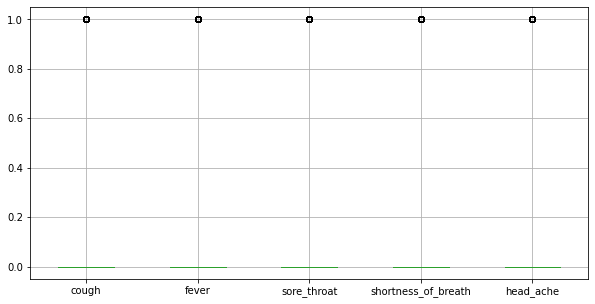

In [11]:
dataTemp=data.drop("Unnamed: 0",axis=1)

dataTemp.plot.box(grid='True',figsize=(10,5))

In [12]:
#Since all the features are categorical, there are no outliers

### iii) Encoding

In [13]:
#We have 4 categorical data "gender","age_60_and_above","test_indication" and "corona_result"
#These values have to be encoded

In [14]:
#Encoding "gender"

#Since "gender" has only 2 values, we can label encode it

from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'gender'.
data.loc[:,['gender']]=label_encoder.fit_transform(data['gender'])
 
data['gender'].unique()

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


array([1, 0])

In [15]:
#Encoding "age_60_and_above"

#Since "age_60_and_above" also has only 2 values, we can label encode it

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'age_60_and_above'.
data.loc[:,['age_60_and_above']]=label_encoder.fit_transform(data['age_60_and_above'])
 
data['age_60_and_above'].unique()

array([0, 1])

In [16]:
#Encoding "test_indication"

#Since "test_indication" has more than 2 separate values, we need to one-hot-encode for better modelling

data = pd.get_dummies(data, columns=["test_indication"], prefix=["test_indication"] ) 

In [17]:
#Encoding "corona_result"

#Since "corona_result" has more than 2 separate values, we need to one-hot-encode for better modelling

data = pd.get_dummies(data, columns=["corona_result"], prefix=["corona_result"] )

In [18]:
#Encoded Dataframe
data

,Unnamed: 0,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other,corona_result_negative,corona_result_other,corona_result_positive
0,0,2020-11-12,0,0,0,0,0,0,1,0,0,1,1,0,0
1,1,2020-11-12,0,1,0,0,0,0,1,0,0,1,1,0,0
2,2,2020-11-12,0,0,0,0,0,1,0,0,0,1,1,0,0
3,3,2020-11-12,0,0,0,0,0,0,1,0,0,1,1,0,0
4,4,2020-11-12,0,1,0,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186268,2742591,2020-03-11,0,0,0,0,0,0,0,0,0,1,1,0,0
2186269,2742592,2020-03-11,0,0,0,0,0,0,0,0,0,1,1,0,0
2186270,2742593,2020-03-11,0,0,0,0,0,0,1,0,0,1,0,1,0
2186271,2742594,2020-03-11,0,0,0,0,0,0,0,0,0,1,1,0,0


### iv) Feature Reduction

In [19]:
#Let's list column values of dataframe
data.columns

Index(['Unnamed: 0', 'test_date', 'cough', 'fever', 'sore_throat',
       'shortness_of_breath', 'head_ache', 'age_60_and_above', 'gender',
       'test_indication_Abroad', 'test_indication_Contact with confirmed',
       'test_indication_Other', 'corona_result_negative',
       'corona_result_other', 'corona_result_positive'],
      dtype='object')

In [20]:
#In these, "Unnamed: 0" and "test_date" are unimportant.
#So we can drop it
data.drop(["Unnamed: 0","test_date"], axis = 1, inplace = True)

In [21]:
#Dataframe after drop
data

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other,corona_result_negative,corona_result_other,corona_result_positive
0,0,0,0,0,0,0,1,0,0,1,1,0,0
1,0,1,0,0,0,0,1,0,0,1,1,0,0
2,0,0,0,0,0,1,0,0,0,1,1,0,0
3,0,0,0,0,0,0,1,0,0,1,1,0,0
4,0,1,0,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186268,0,0,0,0,0,0,0,0,0,1,1,0,0
2186269,0,0,0,0,0,0,0,0,0,1,1,0,0
2186270,0,0,0,0,0,0,1,0,0,1,0,1,0
2186271,0,0,0,0,0,0,0,0,0,1,1,0,0


<AxesSubplot:>

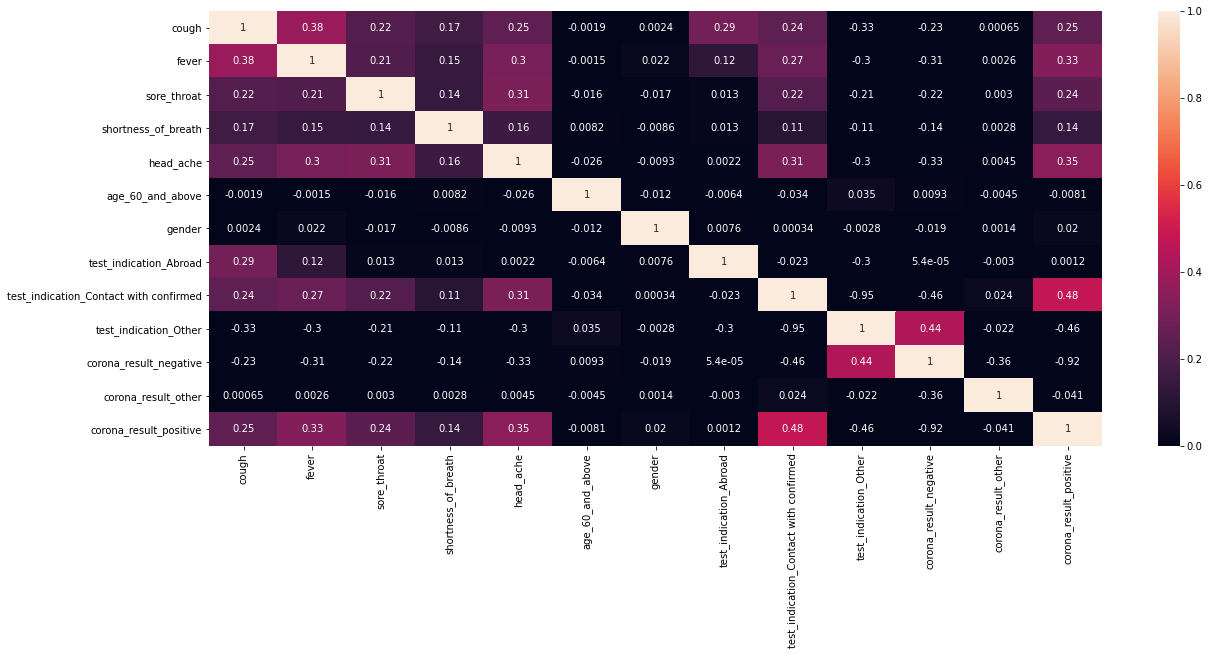

In [22]:
#Checking correlation between variables
correlationmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(correlationmatrix,vmin=0,vmax=1,annot=True)


In [23]:
#As we can see from correlation heatmap, there are no significant correlation between variables

### v) Standardization and Normalization

In [24]:
#Since all variables are categorical, there is no scope for standardization/normalization

# 3 - Exploratory Data Analysis

In [25]:
#Let's try to understand some information from the data with the help of visual aids

dataForAnalysis

#This dataset is a copy of original dataset before encoding. It can be used for analysis

,Unnamed: 0,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
2186268,2742591,2020-03-11,0,0,0,0,0,negative,No,female,Other
2186269,2742592,2020-03-11,0,0,0,0,0,negative,No,female,Other
2186270,2742593,2020-03-11,0,0,0,0,0,other,No,male,Other
2186271,2742594,2020-03-11,0,0,0,0,0,negative,No,female,Other


### i) - Univariate Analysis

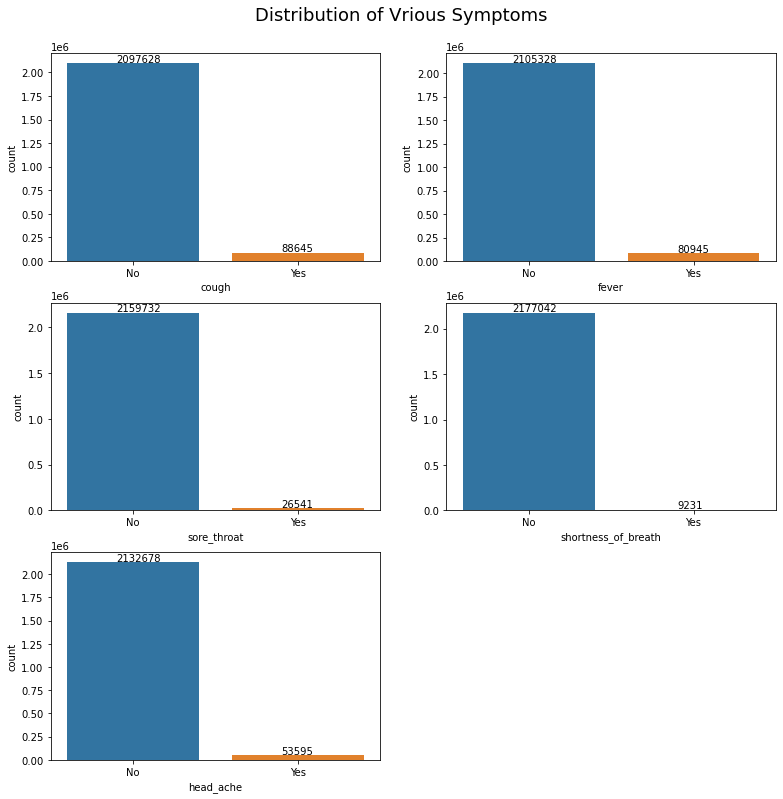

In [26]:
# 1)Let's find distribution of various symptoms

dataForAnalysis = dataForAnalysis.astype(str)
dataForAnalysis =dataForAnalysis.replace(str(1),'Yes')
dataForAnalysis =dataForAnalysis.replace(str(0),'No')

fig,ax= plt.subplots(figsize=(13,13))
fig.suptitle('Distribution of Vrious Symptoms', fontsize=18, y=0.93)
ax1=plt.subplot(3,2,1)
graph=sns.countplot(x=dataForAnalysis["cough"],ax=ax1)
for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+12000))
ax1=plt.subplot(3,2,2)
graph=sns.countplot(x=dataForAnalysis["fever"],ax=ax1)
for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+12000))
ax1=plt.subplot(3,2,3)
graph=sns.countplot(x=dataForAnalysis["sore_throat"],ax=ax1)
for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+12000))
ax1=plt.subplot(3,2,4)
graph=sns.countplot(x=dataForAnalysis["shortness_of_breath"],ax=ax1)
for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+12000))
ax1=plt.subplot(3,2,5)
graph=sns.countplot(x=dataForAnalysis["head_ache"],ax=ax1)
for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+12000))
#sns.scatterplot(data=data, x="Add4(in Thousands)", y="Profit(in Thousands)",ax=ax1)


In [27]:
#INSIGHT
# Majority of tested people don't show symptoms
# This is a welcome move from authority to curb asymptomatic covid spread

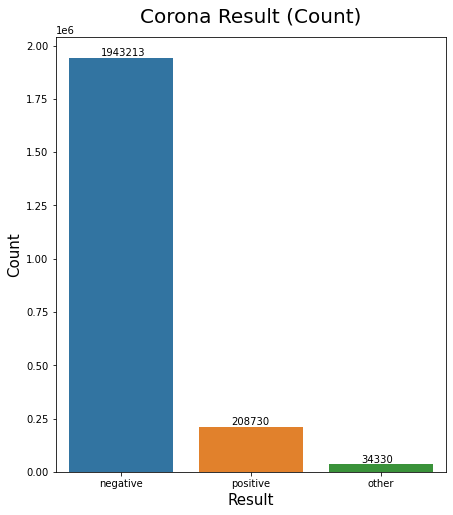

In [28]:
# 2) Let's find distribution of corona results

fig, ax = plt.subplots(figsize=(7,8))
plt.xlabel("xlabel",fontsize=15)
plt.ylabel("ylabel",fontsize=15)
graph=sns.countplot(x=dataForAnalysis["corona_result"])
graph.set_title("Corona Result (Count)",fontsize=20,pad=15)
graph.set(xlabel="Result", ylabel="Count")

for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+10000))

In [29]:
#INSIGHT
#Here we can see that majority of the results are negative. 
#So that we can conslude TPR(Test Positivity Rate) is low


### ii) - Bivariate Analysis

<AxesSubplot:xlabel='corona_result'>

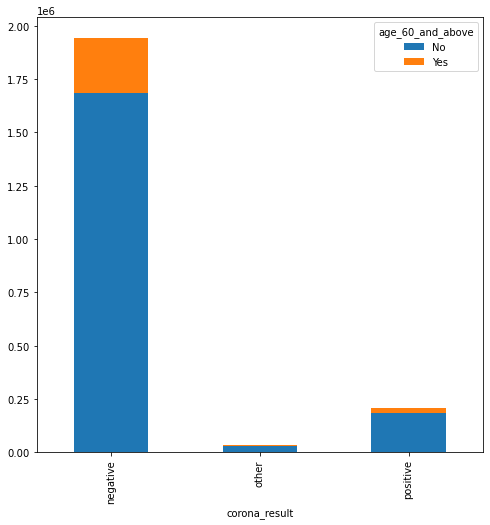

In [30]:
#Lets check age based distribution ineach test results

result_age_60_and_above_table = pd.crosstab(index=dataForAnalysis["corona_result"], columns=dataForAnalysis["age_60_and_above"])
result_age_60_and_above_table.plot(kind="bar", figsize=(8,8),stacked=True)

In [31]:
#INSIGHT
#To the surprise ratio of old aged people in covid positive section is less

<AxesSubplot:xlabel='corona_result'>

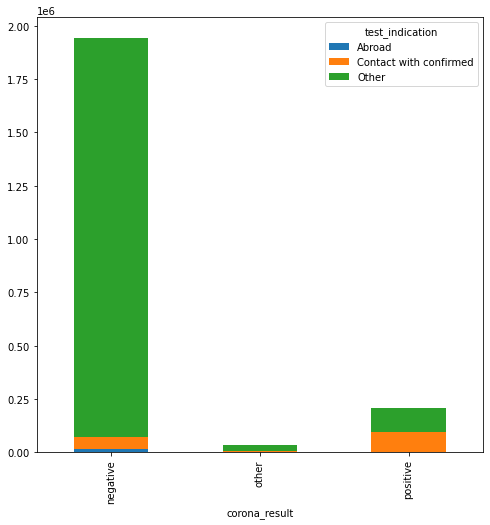

In [32]:
#Lets check test_indication based distribution ineach test results

result_test_indication_table = pd.crosstab(index=dataForAnalysis["corona_result"], columns=dataForAnalysis["test_indication"])
result_test_indication_table.plot(kind="bar", figsize=(8,8),stacked=True)

In [33]:
#INSIGHT
#Here we can see that tranmission by confirmed contact is high in positive cases

# 4 - Modelling

In [34]:
#Now lets create a machine learning model to predict covid test results

#Depended variables
y=data[["corona_result_negative","corona_result_other","corona_result_positive"]]

#Independed variables
X=data.drop(["corona_result_negative","corona_result_other","corona_result_positive"],axis=1)

In [35]:
#Splitting data for training and test
from sklearn.model_selection import train_test_split # Import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### i) Decision Tree

In [36]:
#Modelling_Decision_Tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [37]:
# Model Accuracy

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.914820043849351


### ii) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifer object
rf = RandomForestClassifier()

# Train Random Forest Classifer
rf = rf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = rf.predict(X_test)

In [ ]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
#INSIGHT
#Here we can see, Random forest classifier is slightly more accurate than Decision Tree Classifier
#So let's take our second model for further steps

# 5 - Model Fine Tuning

In [ ]:
#Let's fine tune our model to improve it's efficiency

### i) Feature Importance

In [ ]:
#Checking feature importance of the model
pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)

In [ ]:
#INSIGHT
#Here we can see gender and age bracket are least important for over model.

### ii) Hyperparametric tuning


In [ ]:
#checking available hyperparameters

RandomForestClassifier().get_params()

In [ ]:
# Creating new Random Forest classifer object with optimised parametric values
rf = RandomForestClassifier(criterion="entropy",max_depth=10,max_features=5)

# Train Random Forest Classifer
rf = rf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = rf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#INSIGHT
#By tuning hyperparametric values, we could improve effeciency of our model slightly